In [20]:
import pandas as pd
import numpy as np
import math
import operator
from collections import Counter

In [22]:
my_sheet = 'Sheet1'
file_name = '/home/nbuser/library/BlackFriday2.xlsx'
df = pd.read_excel(file_name, sheetname=my_sheet)
df.head()
df.shape
df["Product_Category_1"].fillna(0, inplace=True)
df["Product_Category_2"].fillna(0, inplace=True)
df["Product_Category_3"].fillna(0, inplace=True)
df.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


## Predicting Purchase based on various products bought

In [42]:
from sklearn.model_selection import train_test_split
x=df[["Product_Category_1",'Product_Category_2','Product_Category_3']]
y=df["Purchase"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.90,random_state = 42)
print(x.iloc[0,:])

Product_Category_1    3.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 0, dtype: float64


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [43]:
def knnpredict(x_train,x_test,y_train,k):
    final=[]
    diff=[]
    ma=[]
    for i in range(len(x_train)):
        dist=np.sqrt(np.sum(np.square(x_train.values[i]-x_test)))
        diff.append((dist,y_train.values[i]))
        
         
    x2=0       
    diff=sorted(diff,key=lambda x: x[0]) 
    for i in range(k):
        x2=x2+diff[i][1]
   
    return (x2/k)



## K value=4

In [66]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,4))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i]) 

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 10159.5
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 12075.5
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 8600.5
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5268.75
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6984.0
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5268.75
Prediction of Species based on test data-
Product_Ca

Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 370, dtype: float64
is- 5268.75
Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 5185.5


In [67]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   54.78669008628299 %


## K value=5

In [64]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,5))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i]) 

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 8543.4
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 11778.8
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 10141.6
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5610.0
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6389.8
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5610.0
Prediction of Species based on test data-
Product_Cate

Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 210, dtype: float64
is- 5610.0
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 370, dtype: float64
is- 5610.0
Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 4498.8


In [65]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   53.71123588027395 %


## K value=7

In [62]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,7))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i]) 

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 6718.0
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 12618.857142857143
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 8308.0
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5737.428571428572
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6521.285714285715
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5737.428571428572
Prediction 

Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 70, dtype: float64
is- 5737.428571428572
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 210, dtype: float64
is- 5737.428571428572
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 370, dtype: float64
is- 5737.428571428572
Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 6691.285714285715


In [63]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   52.170726746592734 %


## K value=9

In [50]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,9))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i])

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 5475.888888888889
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 12610.444444444445
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 8027.0
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5448.444444444444
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6441.0
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5448.444444444444
Prediction 

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 393, dtype: float64
is- 12610.444444444445
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 70, dtype: float64
is- 5448.444444444444
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 210, dtype: float64
is- 5448.444444444444
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 370, dtype: float64
is- 5448.444444444444
Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 8007.0


In [51]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   44.45600469143818 %


## K value=12

In [52]:
f=len(y_test)
final=[]
for i in range(f):
    final.append(knnpredict(x_train,x_test.values[i,:],y_train,12))
    print("Prediction of Species based on test data-")
    print(x_test.iloc[i,:])
    print("is-",final[i])

Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    5.0
Product_Category_3    0.0
Name: 195, dtype: float64
is- 6803.0
Prediction of Species based on test data-
Product_Category_1    3.0
Product_Category_2    4.0
Product_Category_3    5.0
Name: 79, dtype: float64
is- 12695.25
Prediction of Species based on test data-
Product_Category_1     5.0
Product_Category_2     6.0
Product_Category_3    16.0
Name: 479, dtype: float64
is- 7617.833333333333
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 109, dtype: float64
is- 5553.583333333333
Prediction of Species based on test data-
Product_Category_1    8.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 473, dtype: float64
is- 6514.5
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 490, dtype: float64
is- 5553.583333333333
Prediction of Species

Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 70, dtype: float64
is- 5553.583333333333
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 210, dtype: float64
is- 5553.583333333333
Prediction of Species based on test data-
Product_Category_1    5.0
Product_Category_2    0.0
Product_Category_3    0.0
Name: 370, dtype: float64
is- 5553.583333333333
Prediction of Species based on test data-
Product_Category_1    11.0
Product_Category_2    15.0
Product_Category_3     0.0
Name: 319, dtype: float64
is- 6619.333333333333


In [53]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, final)
accuracy=accuracy*100
print("Accuracry(R2 value) is-  ",accuracy,'%')

Accuracry(R2 value) is-   48.13429277547978 %


## Calculation of RMSE

In [54]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
rmse=[]
for k in range(15):
    final=[]
    k = k+1
    for i in range(len(y_test)):
        final.append(knnpredict(x_train,x_test.values[i,:],y_train,k))
        
    er=sqrt(mean_squared_error(y_test,final))
    rmse.append(er)
    print('RMSE error for k value-',k,'is',er)

RMSE error for k value- 1 is 5024.7478236135485
RMSE error for k value- 2 is 3949.8980671542768
RMSE error for k value- 3 is 3628.410394359904
RMSE error for k value- 4 is 3525.447605527301
RMSE error for k value- 5 is 3567.12975139295
RMSE error for k value- 6 is 3611.951457147214
RMSE error for k value- 7 is 3626.0017131473733
RMSE error for k value- 8 is 3762.8885118048247
RMSE error for k value- 9 is 3907.5061635787965
RMSE error for k value- 10 is 3931.3939307486435
RMSE error for k value- 11 is 3802.2624732785716
RMSE error for k value- 12 is 3775.906799041855
RMSE error for k value- 13 is 3776.558333405684
RMSE error for k value- 14 is 3805.266051918218
RMSE error for k value- 15 is 3864.224827890433


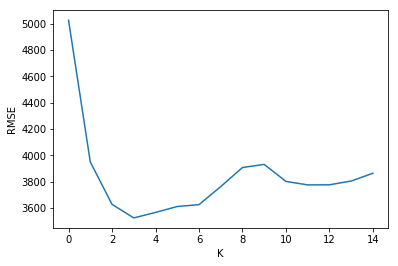

In [56]:
plt.xlabel('K')
plt.ylabel('RMSE')
plt.plot(range(15),rmse)
plt.show()


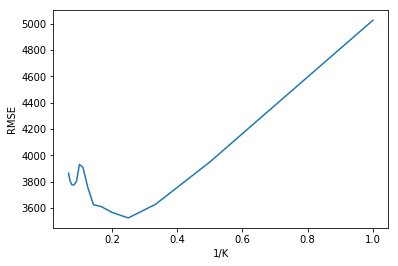

In [57]:
k1=[]
for k in range(15):
    k=k+1
    k1.append(1/k)
    
plt.xlabel('1/K')
plt.ylabel('RMSE')
plt.plot(k1,rmse)
plt.show()
   